<a href="https://colab.research.google.com/github/saiful6602/Computer_Graphics/blob/main/Final_nag_sir_lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

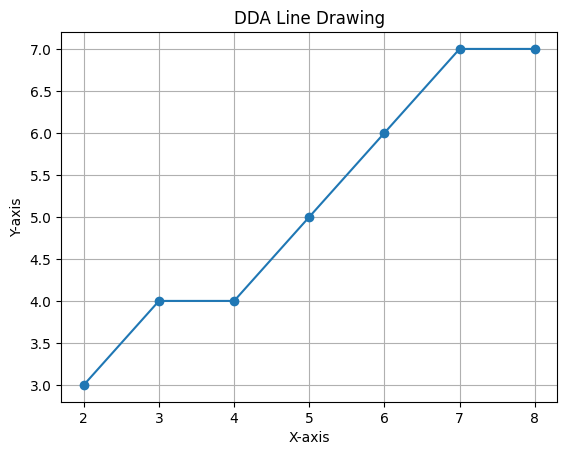

In [ ]:
#LINE DRAWING DDA

import matplotlib.pyplot as plt

def draw_line_DDA(x1, y1, x2, y2):
    points = []
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))

    x_increment = dx / steps
    y_increment = dy / steps

    x, y = x1, y1

    for _ in range(steps):
        points.append((round(x), round(y)))
        x += x_increment
        y += y_increment

    return points

def plot_line(points, title):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Example usage:
x1, y1 = 2, 3
x2, y2 = 9, 8

# DDA algorithm
dda_points = draw_line_DDA(x1, y1, x2, y2)
plot_line(dda_points, 'DDA Line Drawing')

DDA Line Points: [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (3, 5), (4, 6)]


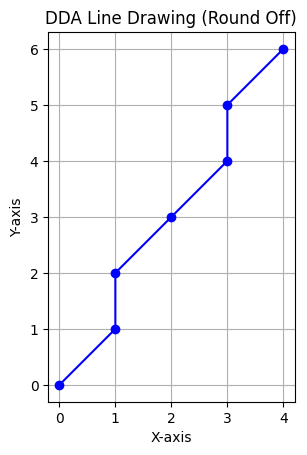

In [23]:
# LINE DRAWING USING DDA (with Round Off)
import matplotlib.pyplot as plt

def draw_line_DDA(x1, y1, x2, y2):
    points = []
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))  # number of steps

    x_increment = dx / steps
    y_increment = dy / steps

    x, y = x1, y1

    for _ in range(steps + 1):  # include last point
        points.append((round(x), round(y)))
        x += x_increment
        y += y_increment

    return points

def plot_line(points, title):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', color='blue', linestyle='-')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

# Example usage:
x1, y1 = 0, 0
x2, y2 = 4, 6

# DDA algorithm
dda_points = draw_line_DDA(x1, y1, x2, y2)

print("DDA Line Points:", dda_points)  # Print all calculated points
plot_line(dda_points, 'DDA Line Drawing (Round Off)')


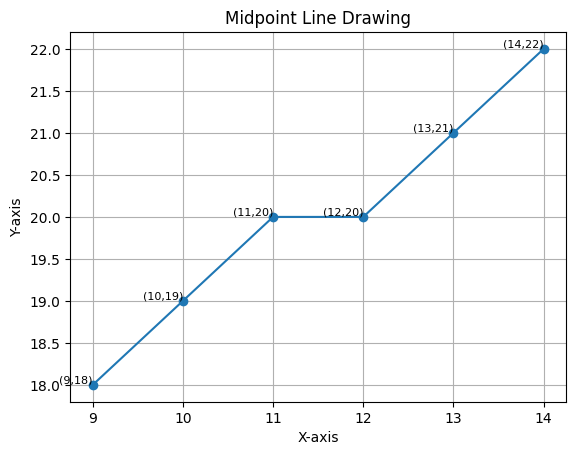

Coordinate Points:
(9, 18)
(10, 19)
(11, 20)
(12, 20)
(13, 21)
(14, 22)

Midpoint Algorithm Table:
-------------------------------------------------
Step  | pk    | pk+1  | xi+1  | yi+1 
-------------------------------------------------
0     | -     | 3     | 9     | 18   
1     | 3     | 1     | 10    | 19   
2     | 1     | -1    | 11    | 20   
3     | -1    | 7     | 12    | 20   
4     | 7     | 5     | 13    | 21   
5     | 5     | 3     | 14    | 22   
-------------------------------------------------


In [8]:
#LINE DRAWING MIDPOINT

import matplotlib.pyplot as plt

def draw_line_midpoint(x1, y1, x2, y2):

    points = []
    table_data = []
    dx = x2 - x1
    dy = y2 - y1

    d = 2 * dy - dx
    y = y1

    step = 0

    table_data.append({
        'Step': step,
        'pk': None,
        'pk+1': d,
        'xi+1': x1,
        'yi+1': y1
    })


    for x in range(x1, x2 + 1):
        points.append((x, y))


        current_pk = d
        next_x = x + 1
        next_y = y

        if d > 0:
            y += 1
            d = d + 2 * dy - 2 * dx
            next_y = y
        else:
            d = d + 2 * dy

        step += 1
        if x < x2:
            table_data.append({
                'Step': step,
                'pk': current_pk,
                'pk+1': d,
                'xi+1': next_x,
                'yi+1': next_y
            })


    return points, table_data

def plot_line(points, title):

    if not points:
        print("No points to plot.")
        return

    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', linestyle='-')

    for(x,y) in points:
        plt.text(x, y, f'({x},{y})', fontsize=8, ha='right', va='bottom')

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()


x1, y1 = 9, 18
x2, y2 = 14, 22

midpoint_points, table_data = draw_line_midpoint(x1, y1, x2, y2)
plot_line(midpoint_points, 'Midpoint Line Drawing')

print("Coordinate Points:")
for point in midpoint_points:
    print(point)

print("\nMidpoint Algorithm Table:")
print("-------------------------------------------------")
print(f"{'Step':<5} | {'pk':<5} | {'pk+1':<5} | {'xi+1':<5} | {'yi+1':<5}")
print("-------------------------------------------------")

for row in table_data:
    pk_val = row['pk'] if row['pk'] is not None else '-'
    print(f"{row['Step']:<5} | {pk_val:<5} | {row['pk+1']:<5} | {row['xi+1']:<5} | {row['yi+1']:<5}")


print("-------------------------------------------------")

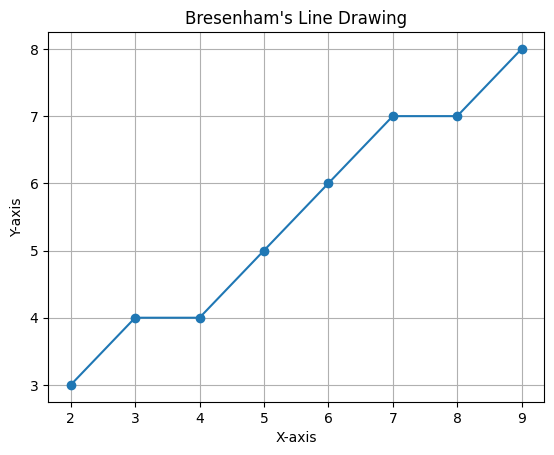

In [3]:
#Bresenham\'s Line Drawing

import matplotlib.pyplot as plt

def draw_line_Bresenham(x1, y1, x2, y2):
    points = []
    dx = x2 - x1
    dy = y2 - y1

    x, y = x1, y1

    points.append((x, y))

    p = 2 * dy - dx

    for _ in range(dx):
        x += 1
        if p < 0:
            p = p + 2 * dy
        else:
            p = p + 2 * dy - 2 * dx
            y += 1
        points.append((x, y))

    return points

def plot_line(points, title):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Example usage:
x1, y1 = 2, 3
x2, y2 = 9, 8

# Bresenham's algorithm
bresenham_points = draw_line_Bresenham(x1, y1, x2, y2)
plot_line(bresenham_points, 'Bresenham\'s Line Drawing')


Q1 (+X, +Y) (15 points):
---------------------------------
Index  | X     | Y    
---------------------------------
1      | 0     | 10   
2      | 1     | 10   
3      | 2     | 10   
4      | 3     | 10   
5      | 4     | 9    
6      | 5     | 9    
7      | 6     | 8    
8      | 7     | 7    
9      | 8     | 6    
10     | 9     | 4    
11     | 9     | 5    
12     | 10    | 0    
13     | 10    | 1    
14     | 10    | 2    
15     | 10    | 3    
---------------------------------

Q2 (-X, +Y) (14 points):
---------------------------------
Index  | X     | Y    
---------------------------------
1      | -10   | 0    
2      | -10   | 1    
3      | -10   | 2    
4      | -10   | 3    
5      | -9    | 4    
6      | -9    | 5    
7      | -8    | 6    
8      | -7    | 7    
9      | -6    | 8    
10     | -5    | 9    
11     | -4    | 9    
12     | -3    | 10   
13     | -2    | 10   
14     | -1    | 10   
---------------------------------

Q3 (-X, -Y) (13 points):
-----

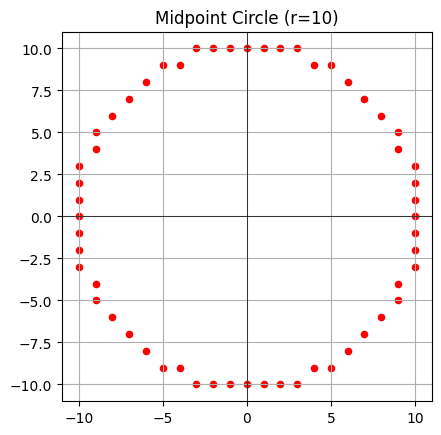

In [11]:
#Midpoint Circle Points

import matplotlib.pyplot as plt

def midpoint_circle(radius, xc=0, yc=0):
    x = 0
    y = radius
    d = 1 - radius
    points = []

    while x <= y:
        # 8-way symmetry
        points.extend([
            (xc + x, yc + y),   # Q1 / Q2
            (xc - x, yc + y),   # Q2
            (xc + x, yc - y),   # Q4
            (xc - x, yc - y),   # Q3
            (xc + y, yc + x),   # Q1
            (xc - y, yc + x),   # Q2
            (xc + y, yc - x),   # Q4
            (xc - y, yc - x)    # Q3
        ])

        if d < 0:
            d = d + 2 * x + 3
        else:
            d = d + 2 * (x - y) + 5
            y -= 1
        x += 1

    # remove duplicates
    points = list(set(points))
    return points


def plot_circle(points, radius, xc=0, yc=0):
    x_vals, y_vals = zip(*points)
    plt.scatter(x_vals, y_vals, c='red', s=20)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0, color='black', linewidth=0.5)  # x-axis
    plt.axvline(0, color='black', linewidth=0.5)  # y-axis
    plt.title(f"Midpoint Circle (r={radius})")
    plt.grid(True)
    plt.show()


def divide_quadrants(points):
    Q1, Q2, Q3, Q4 = [], [], [], []
    for x, y in points:
        if x >= 0 and y >= 0:
            Q1.append((x, y))
        if x < 0 and y >= 0:
            Q2.append((x, y))
        if x < 0 and y < 0:
            Q3.append((x, y))
        if x >= 0 and y < 0:
            Q4.append((x, y))
    return Q1, Q2, Q3, Q4


# Example usage
radius = 10
xc, yc = 0, 0   # center
circle_points = midpoint_circle(radius, xc, yc)

Q1, Q2, Q3, Q4 = divide_quadrants(circle_points)

# Print neatly
def print_quadrant(name, points):
    print(f"\n{name} ({len(points)} points):")
    print("---------------------------------")
    print(f"{'Index':<6} | {'X':<5} | {'Y':<5}")
    print("---------------------------------")
    for i, (x, y) in enumerate(sorted(points), start=1):
        print(f"{i:<6} | {x:<5} | {y:<5}")
    print("---------------------------------")

print_quadrant("Q1 (+X, +Y)", Q1)
print_quadrant("Q2 (-X, +Y)", Q2)
print_quadrant("Q3 (-X, -Y)", Q3)
print_quadrant("Q4 (+X, -Y)", Q4)

plot_circle(circle_points, radius, xc, yc)



Q1 (+X, +Y) (7 points):
---------------------------------
Index  | X     | Y    
---------------------------------
1      | 0     | 5    
2      | 1     | 5    
3      | 2     | 4    
4      | 3     | 3    
5      | 4     | 2    
6      | 5     | 0    
7      | 5     | 1    
---------------------------------

Q2 (-X, +Y) (6 points):
---------------------------------
Index  | X     | Y    
---------------------------------
1      | -5    | 0    
2      | -5    | 1    
3      | -4    | 2    
4      | -3    | 3    
5      | -2    | 4    
6      | -1    | 5    
---------------------------------

Q3 (-X, -Y) (5 points):
---------------------------------
Index  | X     | Y    
---------------------------------
1      | -5    | -1   
2      | -4    | -2   
3      | -3    | -3   
4      | -2    | -4   
5      | -1    | -5   
---------------------------------

Q4 (+X, -Y) (6 points):
---------------------------------
Index  | X     | Y    
---------------------------------
1      | 0     | -5 

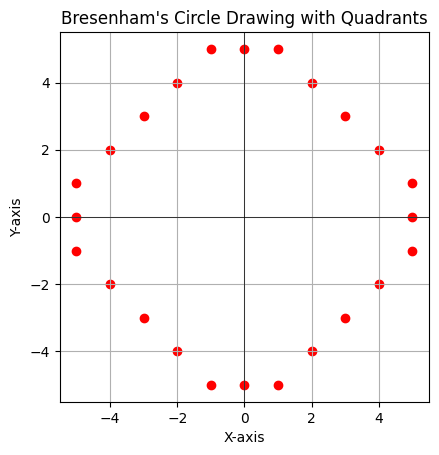

In [19]:
#Bresenham's Circle Points

import matplotlib.pyplot as plt

def draw_circle_bresenham(radius, xc, yc):
    points = []
    x = 0
    y = radius
    d = 3 - 2 * radius  # Initial decision parameter

    while x <= y:
        # 8-way symmetric points
        points.append((x + xc, y + yc))   # Q1 / Q2
        points.append((-x + xc, y + yc))  # Q2
        points.append((x + xc, -y + yc))  # Q4
        points.append((-x + xc, -y + yc)) # Q3
        points.append((y + xc, x + yc))   # Q1
        points.append((-y + xc, x + yc))  # Q2
        points.append((y + xc, -x + yc))  # Q4
        points.append((-y + xc, -x + yc)) # Q3

        x += 1
        if d > 0:
            y -= 1
            d = d + 4 * (x - y) + 10
        else:
            d = d + 4 * x + 6

    # remove duplicates
    points = list(set(points))
    return points


def divide_quadrants(points):
    Q1, Q2, Q3, Q4 = [], [], [], []
    for x, y in points:
        if x >= 0 and y >= 0:
            Q1.append((x, y))
        if x < 0 and y >= 0:
            Q2.append((x, y))
        if x < 0 and y < 0:
            Q3.append((x, y))
        if x >= 0 and y < 0:
            Q4.append((x, y))
    return Q1, Q2, Q3, Q4


def plot_circle(points, title):
    x_values, y_values = zip(*points)
    plt.scatter(x_values, y_values, c="red")
    plt.axhline(0, color='black', linewidth=0.5)  # x-axis
    plt.axvline(0, color='black', linewidth=0.5)  # y-axis
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()


def print_quadrant(name, points):
    print(f"\n{name} ({len(points)} points):")
    print("---------------------------------")
    print(f"{'Index':<6} | {'X':<5} | {'Y':<5}")
    print("---------------------------------")
    for i, (x, y) in enumerate(sorted(points), start=1):
        print(f"{i:<6} | {x:<5} | {y:<5}")
    print("---------------------------------")


# Example usage:
radius = 5
xc, yc = 0, 0

bresenham_circle_points = draw_circle_bresenham(radius, xc, yc)

# Divide into quadrants
Q1, Q2, Q3, Q4 = divide_quadrants(bresenham_circle_points)

# Print quadrant-wise points
print_quadrant("Q1 (+X, +Y)", Q1)
print_quadrant("Q2 (-X, +Y)", Q2)
print_quadrant("Q3 (-X, -Y)", Q3)
print_quadrant("Q4 (+X, -Y)", Q4)

# Plot circle
plot_circle(bresenham_circle_points, "Bresenham's Circle Drawing with Quadrants")



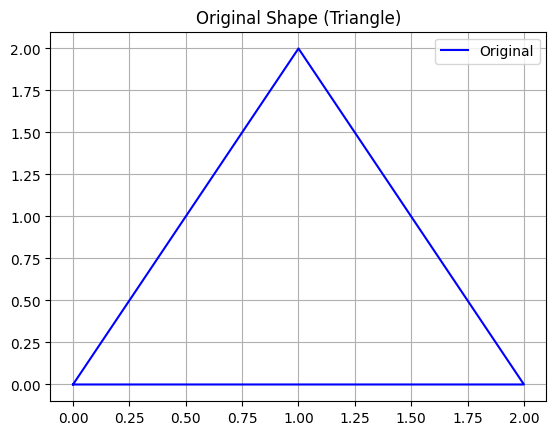

In [12]:
#Original Shape (Triangle)

import numpy as np
import matplotlib.pyplot as plt

def plot_shape(ax, points, label, color):
    """Helper to plot a closed polygon."""
    x = np.append(points[:, 0], points[0, 0])
    y = np.append(points[:, 1], points[0, 1])
    ax.plot(x, y, color, label=label)

# Original Shape (Triangle)
shape = np.array([
    [0, 0],
    [2, 0],
    [1, 2]
])

fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
ax.set_title("Original Shape (Triangle)")
ax.legend()
ax.grid(True)
plt.show()


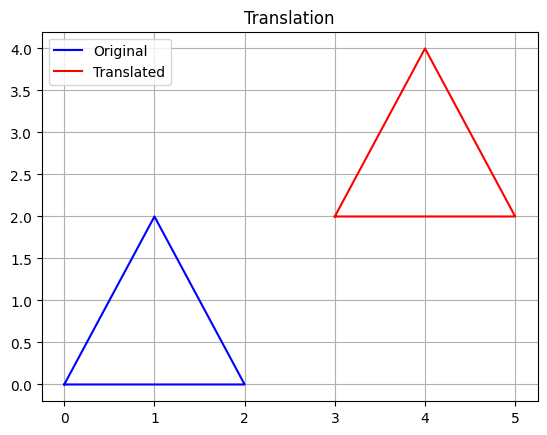

In [13]:
#1. Translation

translation_matrix = np.array([
    [1, 0, 3],
    [0, 1, 2],
    [0, 0, 1]
])
shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))
translated = (translation_matrix @ shape_h.T).T[:, :2]

fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
plot_shape(ax, translated, "Translated", 'r-')
ax.set_title("Translation")
ax.legend()
ax.grid(True)
plt.show()


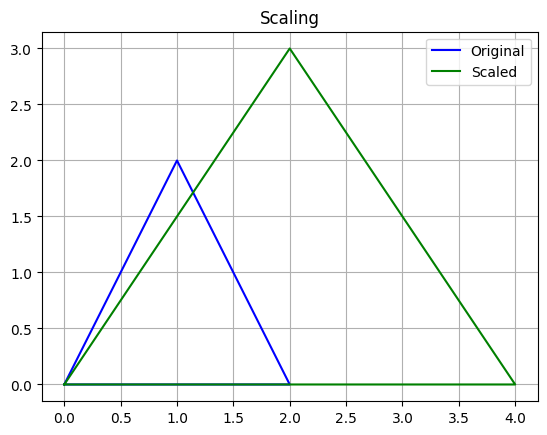

In [14]:
#2. Scaling

scaling_matrix = np.array([
    [2, 0, 0],
    [0, 1.5, 0],
    [0, 0, 1]
])
scaled = (scaling_matrix @ shape_h.T).T[:, :2]

fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
plot_shape(ax, scaled, "Scaled", 'g-')
ax.set_title("Scaling")
ax.legend()
ax.grid(True)
plt.show()



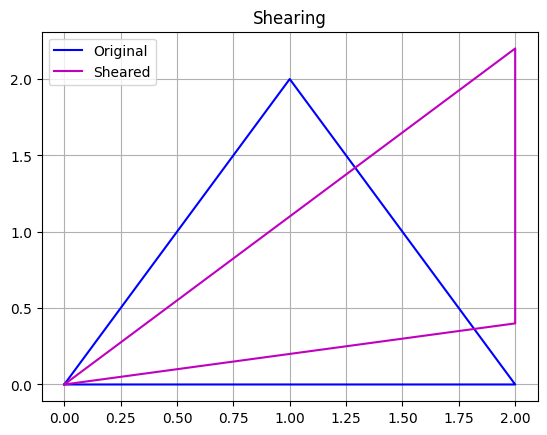

In [27]:
#3. Shearing


shearing_matrix = np.array([
    [1, 0.5, 0],
    [0.2, 1, 0],
    [0, 0, 1]
])
sheared = (shearing_matrix @ shape_h.T).T[:, :2]

fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
plot_shape(ax, sheared, "Sheared", 'm-')
ax.set_title("Shearing")
ax.legend()
ax.grid(True)
plt.show()



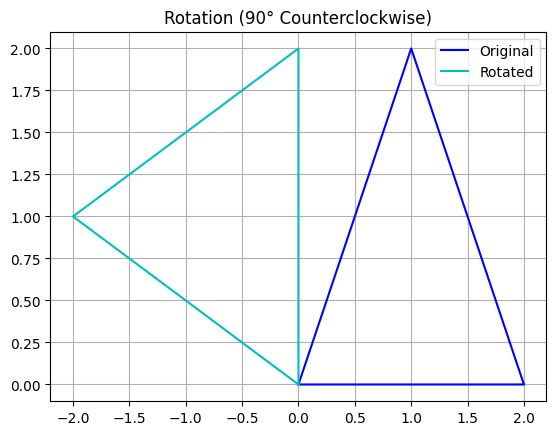

In [39]:
#4. Rotation (Counterclockwise 90°)

theta = np.radians(90)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])
rotated = (rotation_matrix @ shape_h.T).T[:, :2]

fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
plot_shape(ax, rotated, "Rotated", 'c-')
ax.set_title("Rotation (90° Counterclockwise)")
ax.legend()
ax.grid(True)
plt.show()


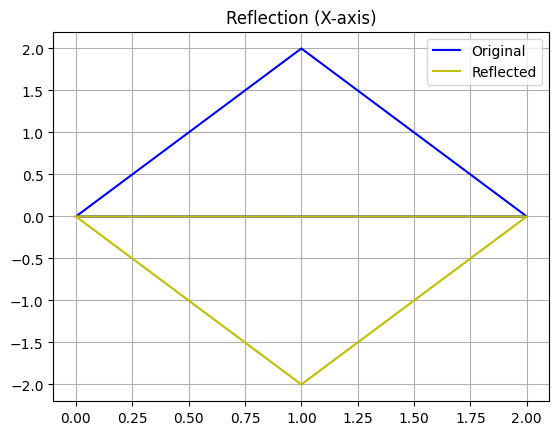

In [31]:
#5. Reflection (Across X-axis)


reflection_matrix = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])
reflected = (reflection_matrix @ shape_h.T).T[:, :2]

fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
plot_shape(ax, reflected, "Reflected", 'y-')
ax.set_title("Reflection (X-axis)")
ax.legend()
ax.grid(True)
plt.show()


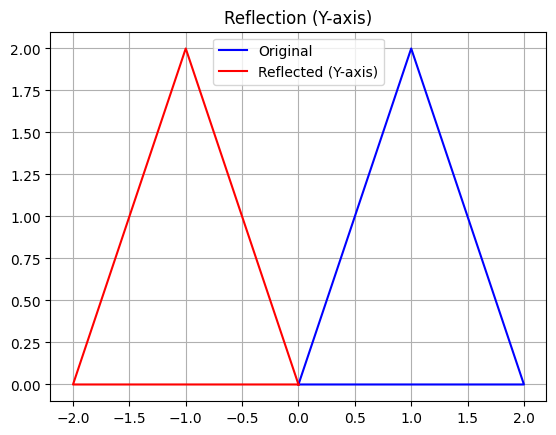

In [18]:
#5. Reflection (Across Y-axis)


import numpy as np
import matplotlib.pyplot as plt

def plot_shape(ax, points, label, color):
    x = np.append(points[:, 0], points[0, 0])
    y = np.append(points[:, 1], points[0, 1])
    ax.plot(x, y, color, label=label)

# Original Shape (Triangle)
shape = np.array([
    [0, 0],
    [2, 0],
    [1, 2]
])
shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))

# Reflection across Y-axis
reflection_matrix_y = np.array([
    [-1, 0, 0],   # negate X
    [0, 1, 0],    # Y unchanged
    [0, 0, 1]
])
reflected_y = (reflection_matrix_y @ shape_h.T).T[:, :2]

# Plot
fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
plot_shape(ax, reflected_y, "Reflected (Y-axis)", 'r-')
ax.set_title("Reflection (Y-axis)")
ax.legend()
ax.grid(True)
plt.show()


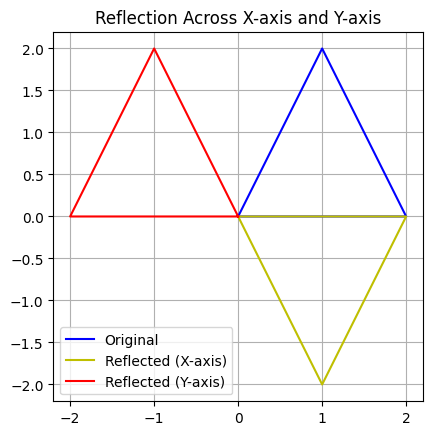

In [41]:
#Both Axis

import numpy as np
import matplotlib.pyplot as plt

def plot_shape(ax, points, label, color):
    x = np.append(points[:, 0], points[0, 0])
    y = np.append(points[:, 1], points[0, 1])
    ax.plot(x, y, color, label=label)

# Original Shape (Triangle)
shape = np.array([
    [0, 0],
    [2, 0],
    [1, 2]
])
shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))

# Reflection across X-axis
reflection_matrix_x = np.array([
    [1, 0, 0],   # X unchanged
    [0, -1, 0],  # negate Y
    [0, 0, 1]
])
reflected_x = (reflection_matrix_x @ shape_h.T).T[:, :2]

# Reflection across Y-axis
reflection_matrix_y = np.array([
    [-1, 0, 0],  # negate X
    [0, 1, 0],   # Y unchanged
    [0, 0, 1]
])
reflected_y = (reflection_matrix_y @ shape_h.T).T[:, :2]

# Plot all in one figure
fig, ax = plt.subplots()
plot_shape(ax, shape, "Original", 'b-')
plot_shape(ax, reflected_x, "Reflected (X-axis)", 'y-')
plot_shape(ax, reflected_y, "Reflected (Y-axis)", 'r-')

ax.set_title("Reflection Across X-axis and Y-axis")
ax.legend()
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


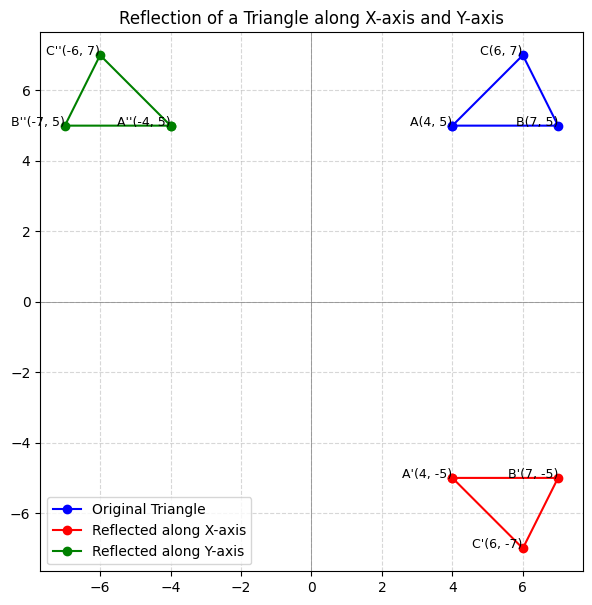

Reflection along X-axis:
A' = (4, -5)
B' = (7, -5)
C' = (6, -7)

Reflection along Y-axis:
A'' = (-4, 5)
B'' = (-7, 5)
C'' = (-6, 7)


In [34]:
#reflection both axis

import matplotlib.pyplot as plt

A = (4, 5)
B = (7, 5)
C = (6, 7)
def reflect_x(x, y):
    return x, -y
def reflect_y(x, y):
    return -x, y
A_x = reflect_x(*A)
B_x = reflect_x(*B)
C_x = reflect_x(*C)

A_y = reflect_y(*A)
B_y = reflect_y(*B)
C_y = reflect_y(*C)

orig_x = [A[0], B[0], C[0], A[0]]
orig_y = [A[1], B[1], C[1], A[1]]

xaxis_x = [A_x[0], B_x[0], C_x[0], A_x[0]]
xaxis_y = [A_x[1], B_x[1], C_x[1], A_x[1]]

yaxis_x = [A_y[0], B_y[0], C_y[0], A_y[0]]
yaxis_y = [A_y[1], B_y[1], C_y[1], A_y[1]]
plt.figure(figsize=(7,7))
plt.plot(orig_x, orig_y, 'b-o', label='Original Triangle')
plt.text(A[0], A[1], f"A{A}", fontsize=9, ha='right')
plt.text(B[0], B[1], f"B{B}", fontsize=9, ha='right')
plt.text(C[0], C[1], f"C{C}", fontsize=9, ha='right')

plt.plot(xaxis_x, xaxis_y, 'r-o', label="Reflected along X-axis")
plt.text(A_x[0], A_x[1], f"A'({A_x[0]}, {A_x[1]})", fontsize=9, ha='right')
plt.text(B_x[0], B_x[1], f"B'({B_x[0]}, {B_x[1]})", fontsize=9, ha='right')
plt.text(C_x[0], C_x[1], f"C'({C_x[0]}, {C_x[1]})", fontsize=9, ha='right')

plt.plot(yaxis_x, yaxis_y, 'g-o', label="Reflected along Y-axis")
plt.text(A_y[0], A_y[1], f"A''({A_y[0]}, {A_y[1]})", fontsize=9, ha='right')
plt.text(B_y[0], B_y[1], f"B''({B_y[0]}, {B_y[1]})", fontsize=9, ha='right')
plt.text(C_y[0], C_y[1], f"C''({C_y[0]}, {C_y[1]})", fontsize=9, ha='right')

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.title('Reflection of a Triangle along X-axis and Y-axis')
plt.axis('equal')
plt.show()

print("Reflection along X-axis:")
print(f"A' = {A_x}")
print(f"B' = {B_x}")
print(f"C' = {C_x}")

print("\nReflection along Y-axis:")
print(f"A'' = {A_y}")
print(f"B'' = {B_y}")
print(f"C'' = {C_y}")


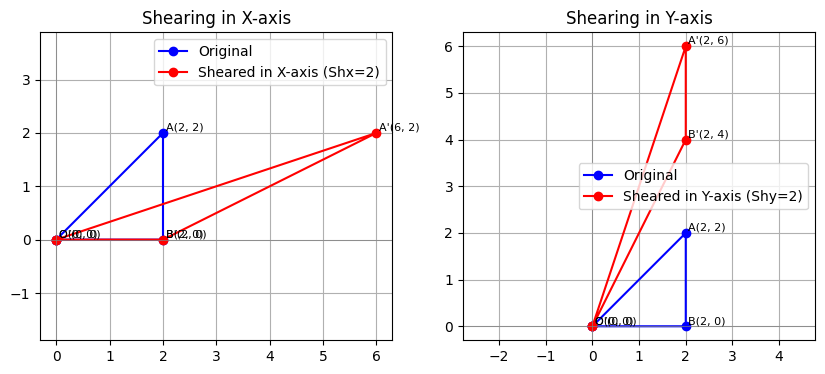

Shearing in X-axis:
O' = (0, 0)
B' = (2, 0)
A' = (6, 2)

Shearing in Y-axis:
O' = (0, 0)
B' = (2, 4)
A' = (2, 6)


In [33]:
#shearing both axis

import matplotlib.pyplot as plt

O = (0, 0)
B = (2, 0)
A = (2, 2)

def shear_x(point, shx):
    x, y = point
    return x + shx * y, y

def shear_y(point, shy):
    x, y = point
    return x, y + shy * x

Shx = 2
Shy = 2

O_x = shear_x(O, Shx)
B_x = shear_x(B, Shx)
A_x = shear_x(A, Shx)
O_y = shear_y(O, Shy)
B_y = shear_y(B, Shy)
A_y = shear_y(A, Shy)

orig_x = [O[0], B[0], A[0], O[0]]
orig_y = [O[1], B[1], A[1], O[1]]

shear_x_x = [O_x[0], B_x[0], A_x[0], O_x[0]]
shear_x_y = [O_x[1], B_x[1], A_x[1], O_x[1]]

shear_y_x = [O_y[0], B_y[0], A_y[0], O_y[0]]
shear_y_y = [O_y[1], B_y[1], A_y[1], O_y[1]]

def annotate_points(points, names, ax):
    for (x, y), name in zip(points, names):
        ax.text(x + 0.05, y + 0.05, f"{name}({x}, {y})", fontsize=8)

plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(orig_x, orig_y, 'bo-', label='Original')
ax1.plot(shear_x_x, shear_x_y, 'ro-', label=f'Sheared in X-axis (Shx={Shx})')
ax1.axhline(0, color='gray', linewidth=0.5)
ax1.axvline(0, color='gray', linewidth=0.5)
ax1.set_title("Shearing in X-axis")
ax1.axis('equal')
ax1.grid(True)
ax1.legend()

annotate_points([O, B, A], ["O", "B", "A"], ax1)
annotate_points([O_x, B_x, A_x], ["O'", "B'", "A'"], ax1)

ax2 = plt.subplot(1, 2, 2)
ax2.plot(orig_x, orig_y, 'bo-', label='Original')
ax2.plot(shear_y_x, shear_y_y, 'ro-', label=f'Sheared in Y-axis (Shy={Shy})')
ax2.axhline(0, color='gray', linewidth=0.5)
ax2.axvline(0, color='gray', linewidth=0.5)
ax2.set_title("Shearing in Y-axis")
ax2.axis('equal')
ax2.grid(True)
ax2.legend()

annotate_points([O, B, A], ["O", "B", "A"], ax2)
annotate_points([O_y, B_y, A_y], ["O'", "B'", "A'"], ax2)

plt.show()

print("Shearing in X-axis:")
print(f"O' = {O_x}")
print(f"B' = {B_x}")
print(f"A' = {A_x}")

print("\nShearing in Y-axis:")
print(f"O' = {O_y}")
print(f"B' = {B_y}")
print(f"A' = {A_y}")
